Data Organization & Processing

In [26]:
# Gets necessary imports
import numpy as np
import heapq
import pandas as pd
import matplotlib.pyplot as plt

boba_data_set = pd.read_csv('bayarea_boba_spots.csv') # Reads the boba data set

# Organizes the boba data into their own individual variables
shop_names = boba_data_set['name'] # Gets all shop names
ratings = boba_data_set['rating'] # Gets all ratings
cities = boba_data_set['city'] # Gets all cities
latitudes = boba_data_set['lat'] # Gets the latitudes
longitudes = boba_data_set['long'] # Gets the Longitudes
# Hashamp(or dictionary) is used to pair the names with the scores for easy access, and averages any repeated shop names
# In each pair, the key will represent the store name, and the value will be a 
# numpy array holding two values: First index will be the average ratings,
# and the second will be the total quantity of that specific shop
hashmap = {}
for i in range(len(shop_names)):
    # Checks if the current shop already exist inside the hashmap, and add that to our total value.
    if shop_names[i] in hashmap:
        shop_arr = hashmap[shop_names[i]]
        shop_arr[1] += 1
        shop_arr[0] += float(ratings[i])
    # Initializes a new shop if it is not already present inside the hashmap
    else:
        new_arr = [0,0]
        new_arr[0] = float(ratings[i])
        new_arr[1] = 1
        hashmap[shop_names[i]] = new_arr

# We now average all the ratings if they have more than one shop 
for current in hashmap.keys():
    pair = hashmap[current]
    avg = pair[0] / pair[1]
    hashmap[current][0] = avg


housing_data_set = pd.read_csv('housing.csv') # Reads the housing data set

# Organizes the housing data into their own individual variables
longitudes_house = housing_data_set['longitude'] # Gets the longitudes of the houses
latitudes_house = housing_data_set['latitude'] # Gets the latitidues of the houses
house_values = housing_data_set['median_house_value'] # Gets the median house values

<class 'pandas.core.series.Series'>


/var/folders/8c/lthywc3s61dbkw2kgtfdw68m0000gn/T/ipykernel_63398/2460081738.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


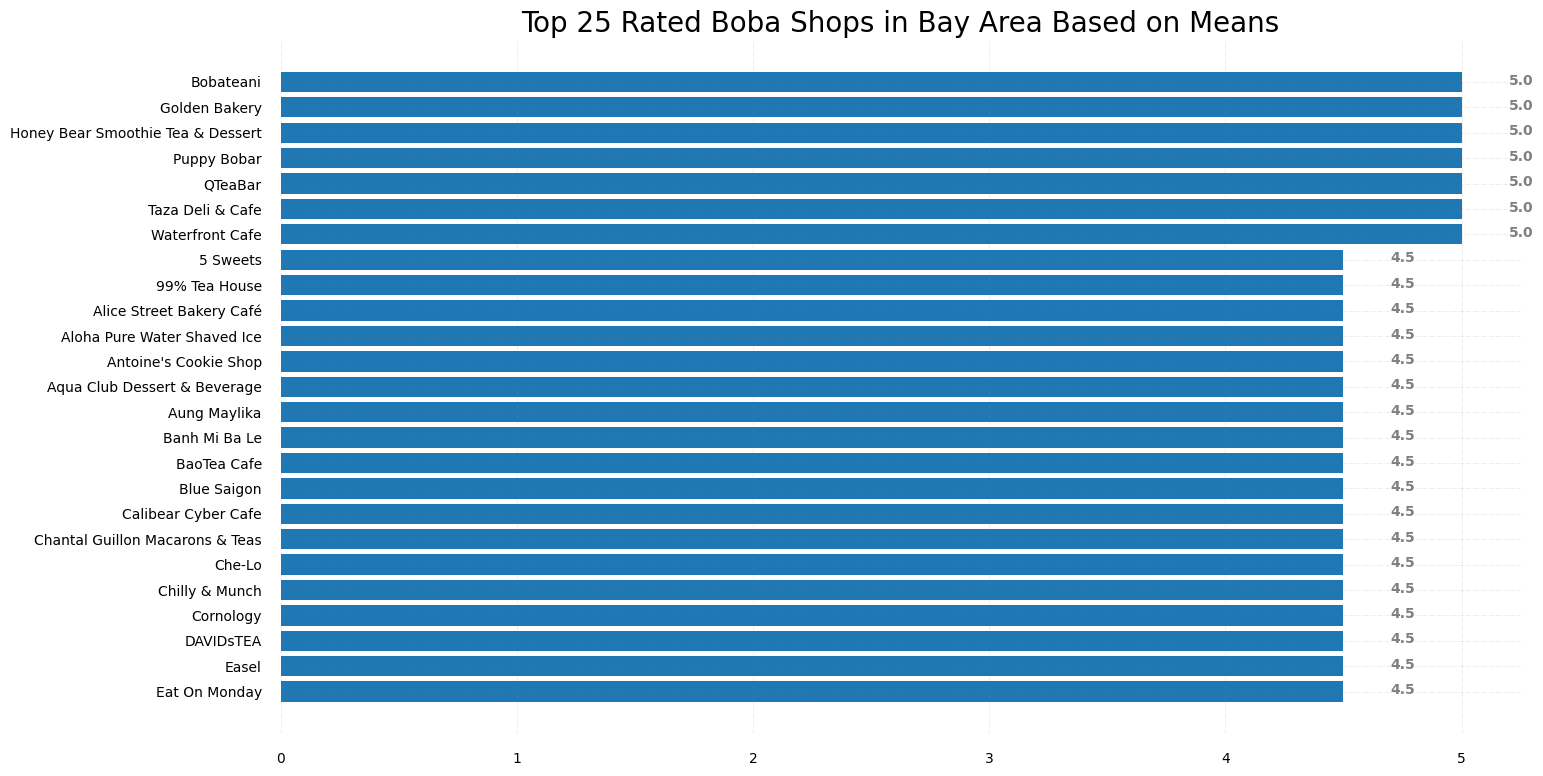

In [55]:

# Top 25 Scores:

# We will use a priority queue for this portion since its easier to get the top 25 values
prio_queue = []
top_25_stores_ratings = np.zeros(25)
top_25_stores_names = []
# A set that traces duplicates
checker = set()
for i in range(len(shop_names)):
    # Continues if we see a duplicate
    if shop_names[i] in checker:
        continue
    # We initialize each shop within the hashmap and store it inside our priority queue
    new_list = [0,0,0]
    pair = hashmap[shop_names[i]]
    new_list[0] = pair[0] * -1
    new_list[1] = pair[1] * - 1
    new_list[2] = str(shop_names[i])
    heapq.heappush(prio_queue, new_list)
    checker.add(shop_names[i])

# The priority queue will have 2 main parameters to consider: The rating, and the quantity of the same shop.
# If the rating is the same, then the priority queue will
# consider which store has a higher quantity, and sort it based off that rule
for i in range(25):
    current = heapq.heappop(prio_queue)
    top_25_stores_ratings[i] = current[0] * -1
    top_25_stores_names.append(current[2])


fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(top_25_stores_names, top_25_stores_ratings)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 25 Rated Boba Shops in Bay Area Based on Means',
             loc ='center',fontsize = 20 )

# Show Plot
plt.show()